## Avocado Project

#### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


#### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


#### Dataset Link-

•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
# Import Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing DataSet

df=pd.read_csv(r"C:\Users\Rabi Kumar\Assignment\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-18,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-18,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-18,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-18,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Exploratory Data Analysis(EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Comment :

There are 13 features in data.

Region has object datatype.

Date by default data type is object which need to change to datetime datatype.

Other variable are float & int datatypes.

In [7]:
# Statistical summary of numerical columns

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Comment :

We can easily suspect that some of the features contain outliers after looking at 50% and max columns.

For most of columns have minimum value of zero.

Almost in all columns value of mean is greater than median. Data is right skewed.

For most of columns value of std. deviation is greater than mean i.e. data is spread.

In [8]:
# check the duplicate data for all columns

df.duplicated().sum()

0

In [9]:
# checking the null values

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

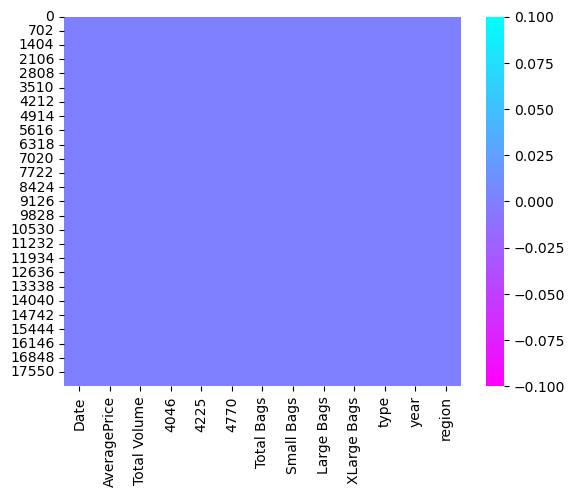

In [10]:
# lets visuallize it using heatmap

sns.heatmap(df.isnull(),cmap="cool_r")

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0


In [12]:
# WE WILL DIVIDE DATE COLUMN INTO TWO CATEGORIES WHICH WILL HELP IN OUR ANALYSIS

df.Date = pd.to_datetime(df.Date)
Day = df.Date.dt.day.to_frame()
month = df.Date.dt.month.to_frame()

Date= Day.join(month, how='right', lsuffix='_day', rsuffix="_month")
df = df.join(Date, how= "left")
df.drop("Date", inplace = True, axis = 1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_day,Date_month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [13]:
df['Date_month']=df['Date_month'].astype('str')
df['Date_day']=df['Date_day'].astype('str')

#### Encoding the Data with Label Encoder converting all the catagorical data into numeric values.

In [14]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['type', 'region', "Date_month", 'Date_day']

for i in catagorical_data:
    df[i]=LE.fit_transform(df[i])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Date_day      18249 non-null  int32  
 13  Date_month    18249 non-null  int32  
dtypes: float64(9), int32(4), int64(1)
memory usage: 1.7 MB


In [16]:
# Lets Check the NaN values

df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Date_day        0
Date_month      0
dtype: int64

In [17]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_day,Date_month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.007743,0.074701
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,0.006428,0.002352
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,0.011297,0.005374
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,0.000949,0.002528
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,0.009772,0.004637
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,0.005795,-0.002249
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,0.008818,-0.000158
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.005953,-0.010322
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,0.033213,0.023615
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000092,-0.000130


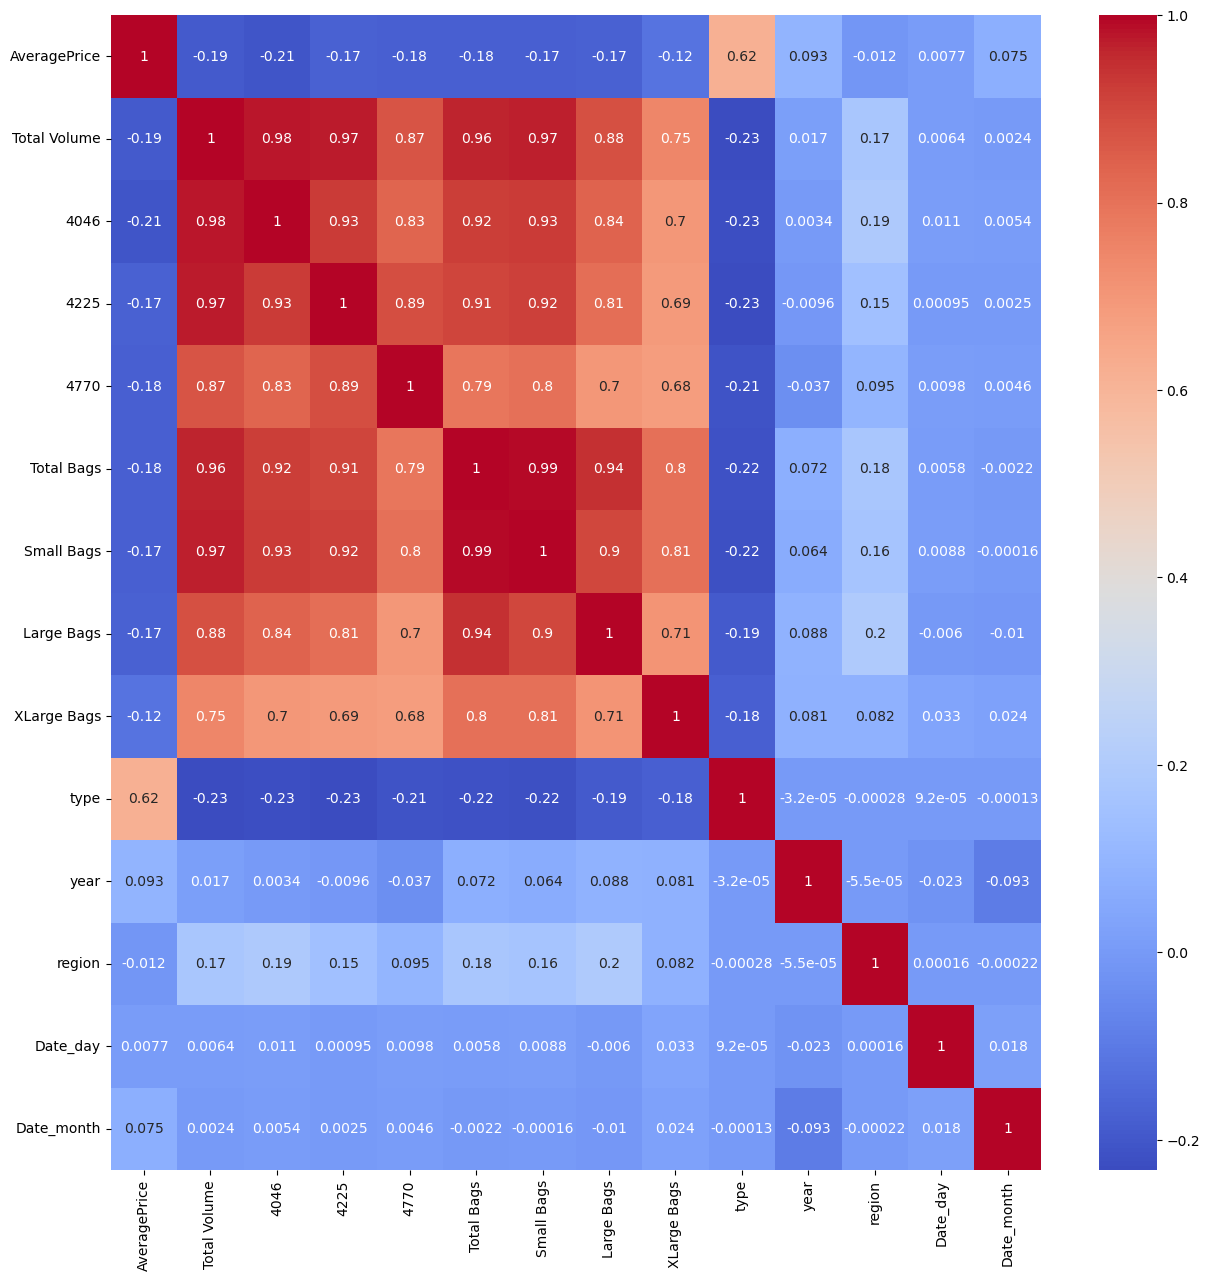

In [18]:
# We will visualize the correlation in a Graph

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

The observation of Correlation and the detail we will visualize with Target variable 1. AveragePrice 2. region

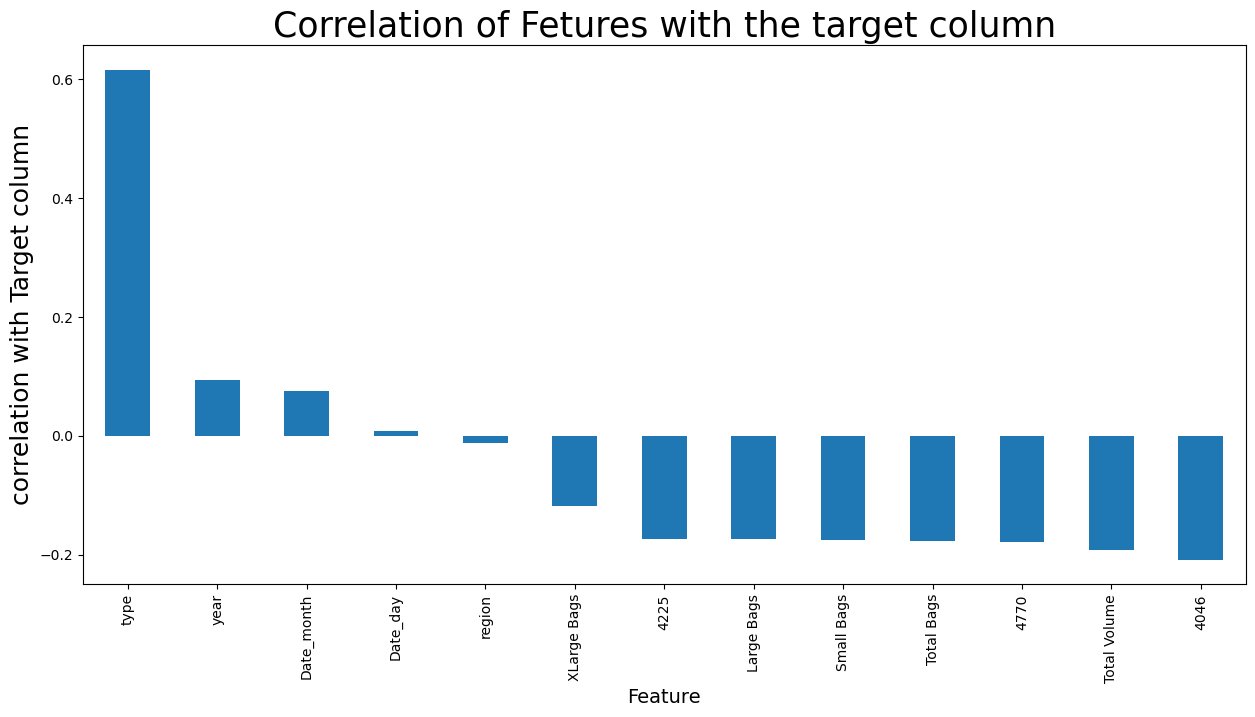

In [19]:
plt.figure(figsize=(15,7))
df.corr()["AveragePrice"].sort_values(ascending=False).drop(["AveragePrice"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

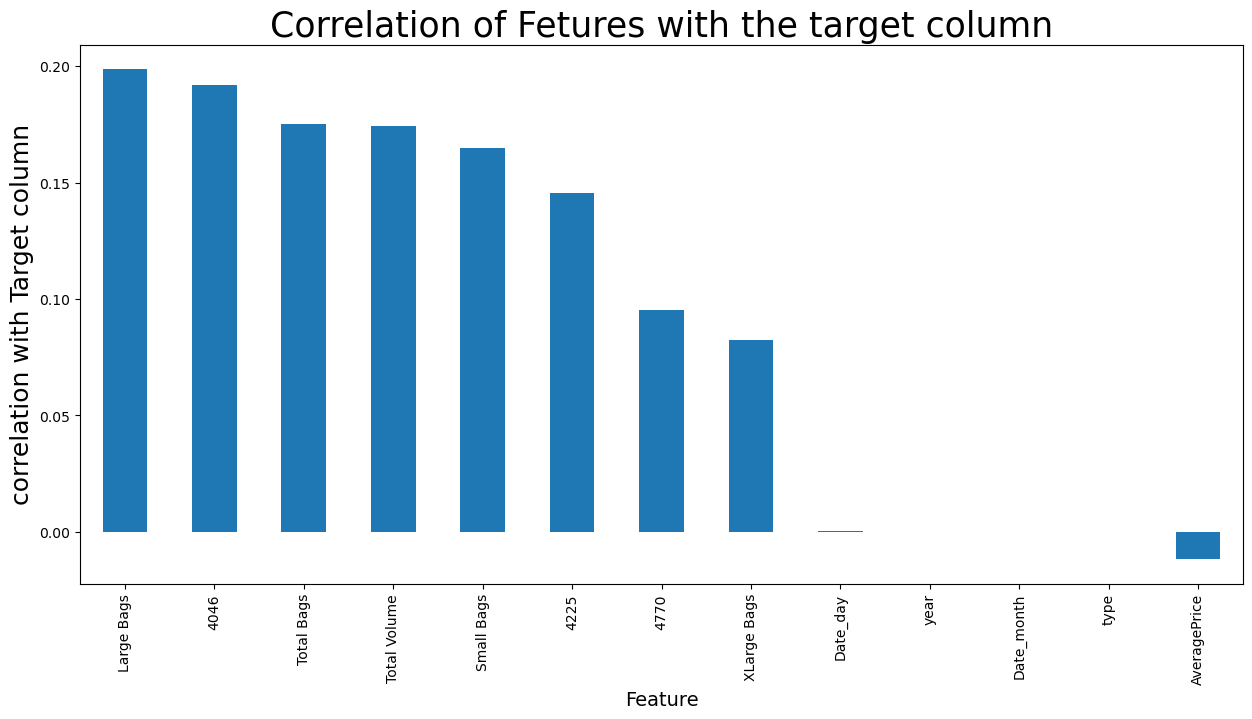

In [20]:
plt.figure(figsize=(15,7))
df.corr()["region"].sort_values(ascending=False).drop(["region"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

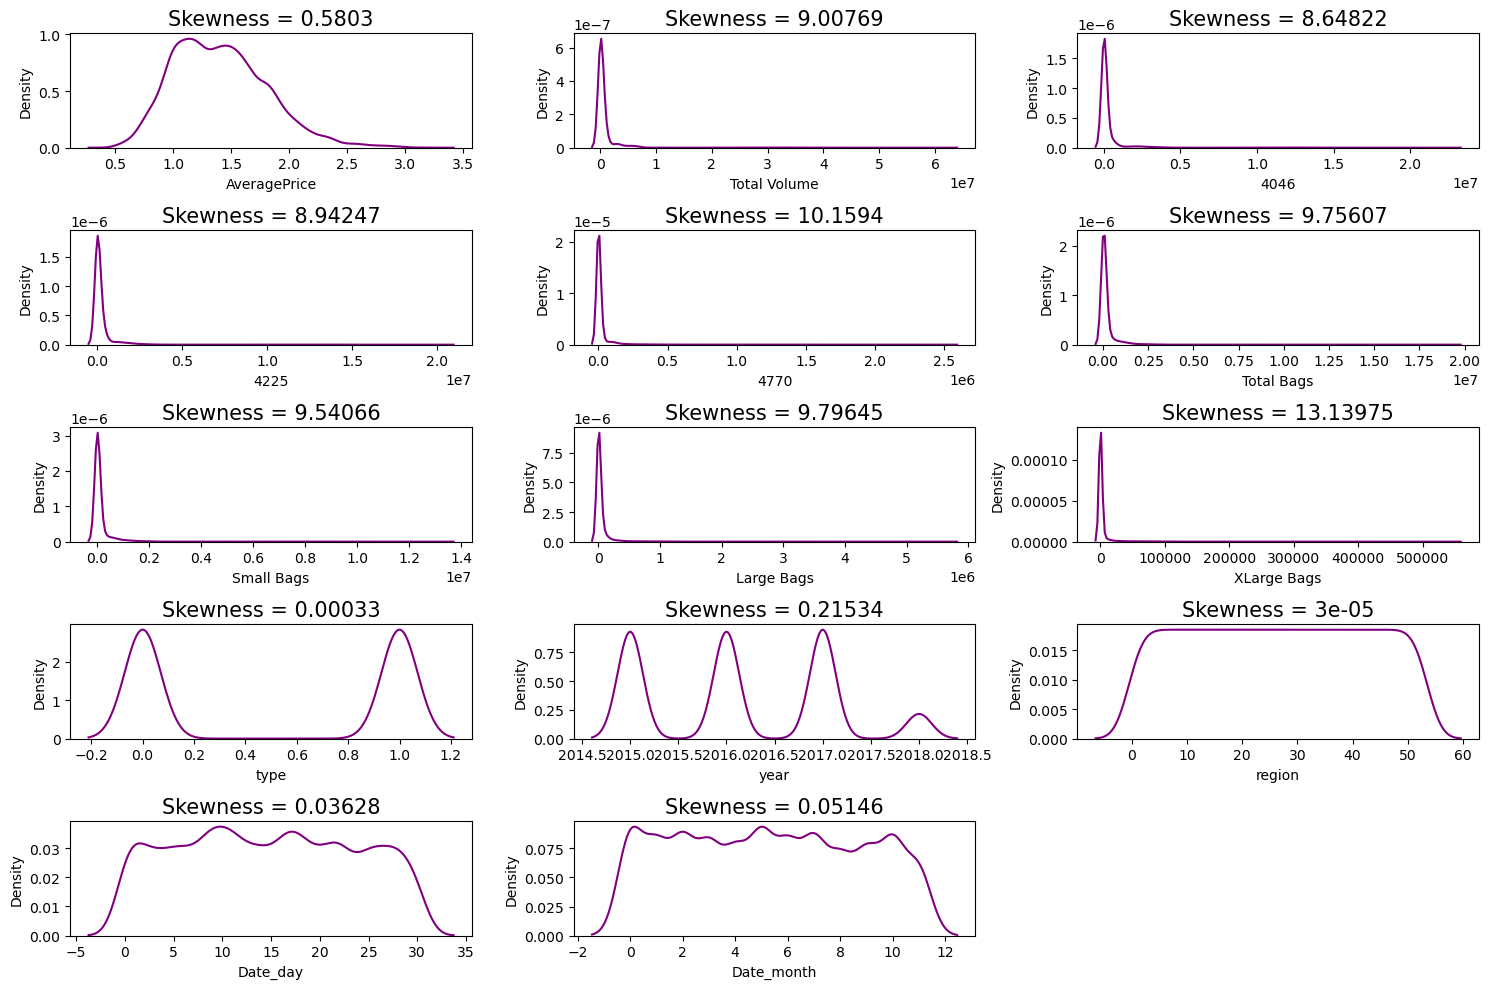

In [21]:
# Skeness Identification

plt.figure(figsize=(15,10))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(5,3,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

In [22]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness

,Feature_names,Skew
0,XLarge Bags,13.139751
1,4770,10.159396
2,Large Bags,9.796455
3,Total Bags,9.756072
4,Small Bags,9.540660
5,Total Volume,9.007687
6,4225,8.942466
7,4046,8.648220
8,AveragePrice,0.580303
9,year,0.215339


In [24]:
df.skew().mean()

5.705317444792711

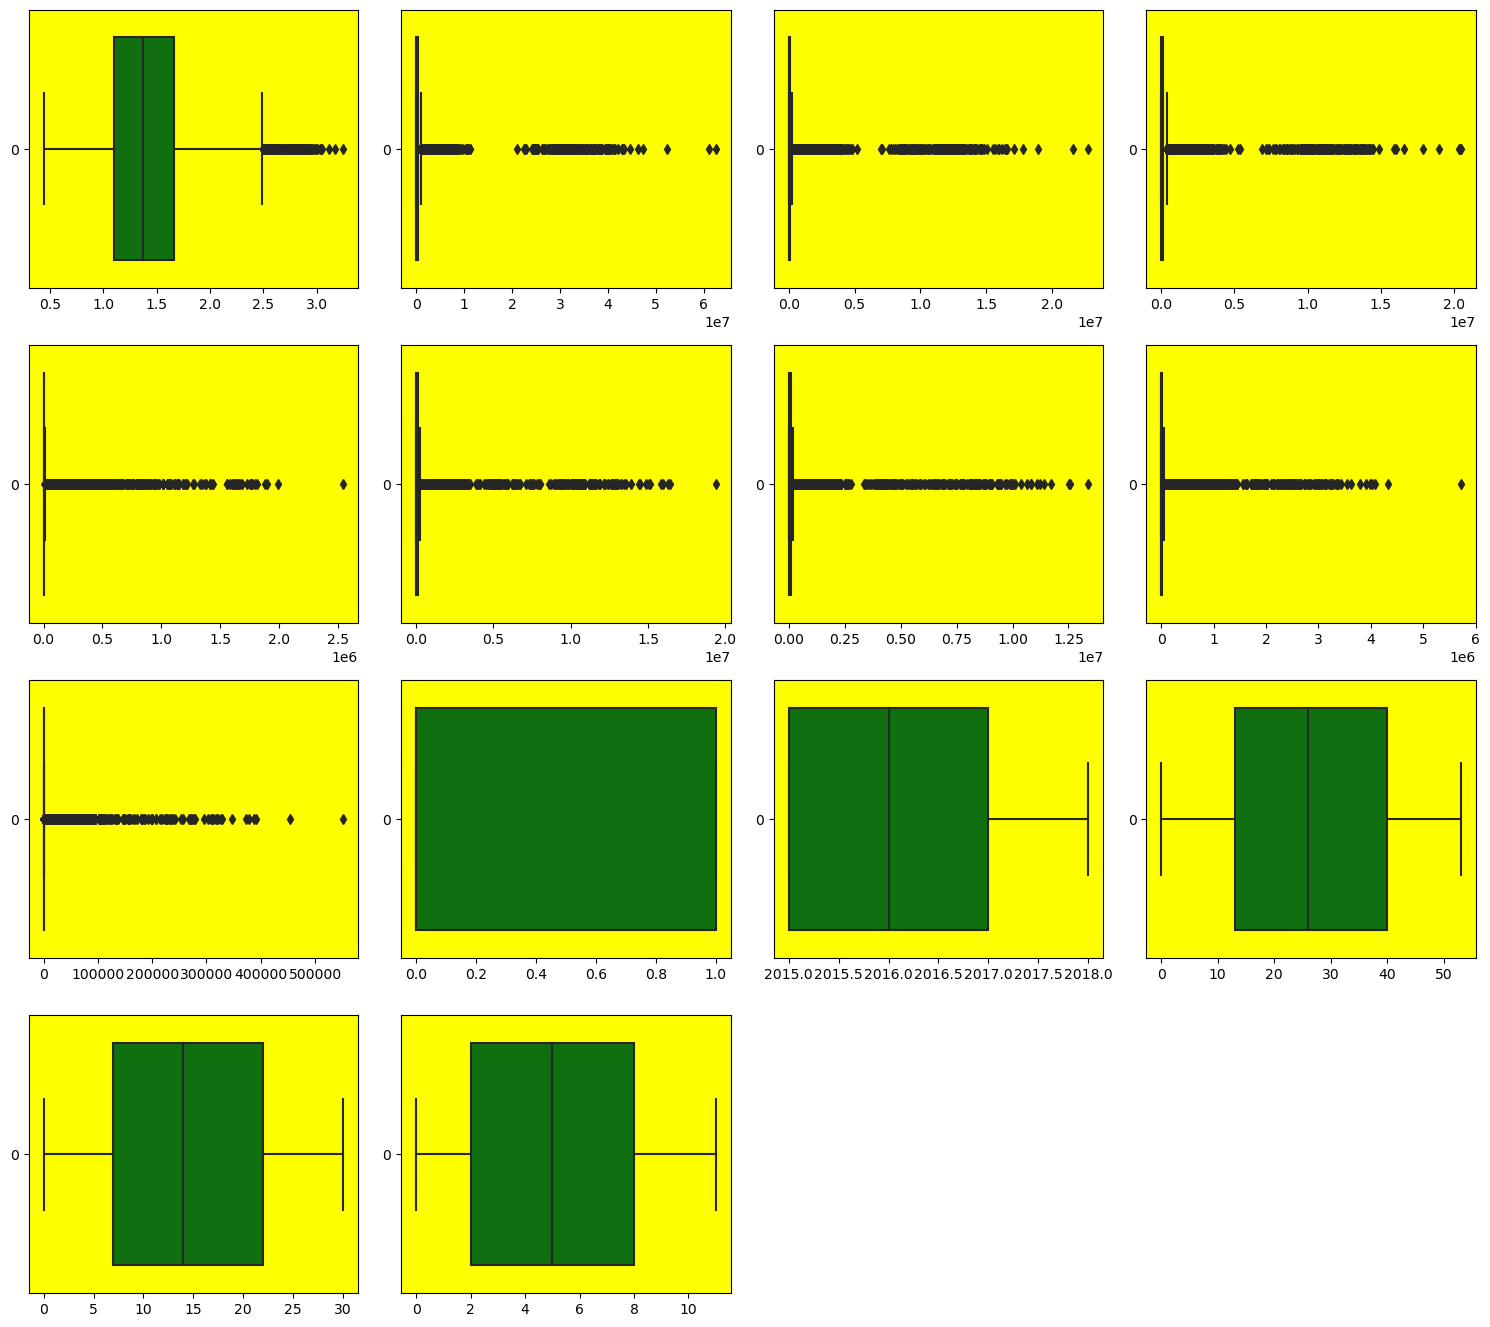

In [25]:
plt.figure(figsize=(15,50))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = "green",orient = "h")
    ax.set_facecolor("yellow")
    plt.tight_layout()

From the above observation its evident that the data have more outliers lets try in removing the outliers.

In [26]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_day,Date_month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,19,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,3
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,4,3
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,3,8
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,11,6
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,20,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,13,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,5,0


In [27]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new1.shape}\nThe percentage of data loss {((1510-894)/1510)*100}%")

Orginal Data (18249, 14)
After Removing outliers (11538, 14)
The percentage of data loss 40.794701986754966%


In [28]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]

In [29]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((1510-1427)/1510)*100}%")

Orginal Data (18249, 14)
After Removing outliers (17651, 14)
The percentage of data loss 5.496688741721854%


The loss of data is 5.49% in Z-Score method and 40% in IQR method which is pity bad and on removing the same will affect the performance of the data so we have to work with the outliers present in the data.

In [30]:
Avacado_color_1 ="#F2E880"
Avacado_color_2 ="#FFE12D"
Avacado_color_3 ="#8BC451"
Avacado_color_4 ="#356211"
Avacado_color_5 ="#6C8F32"

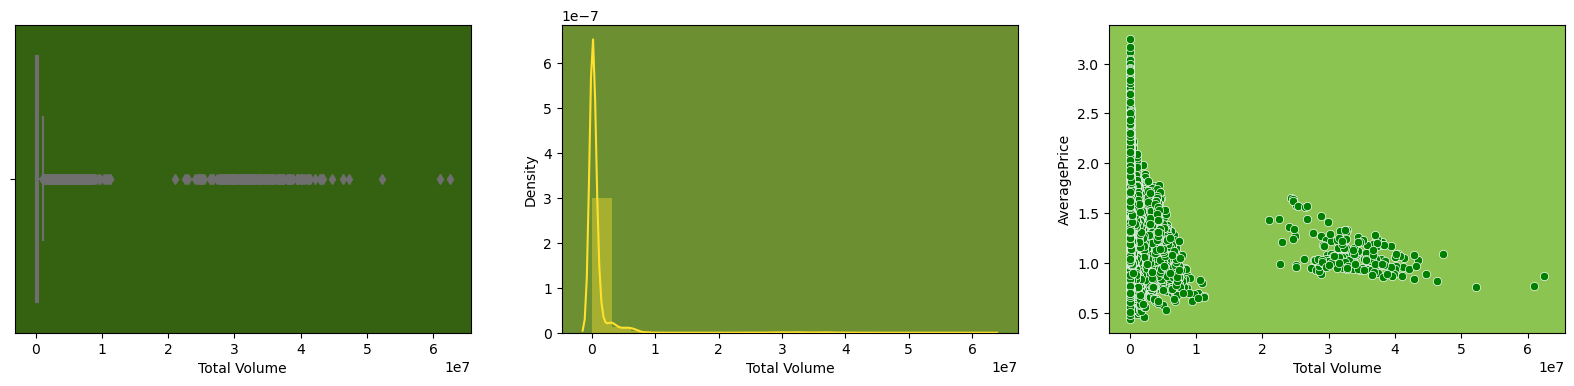

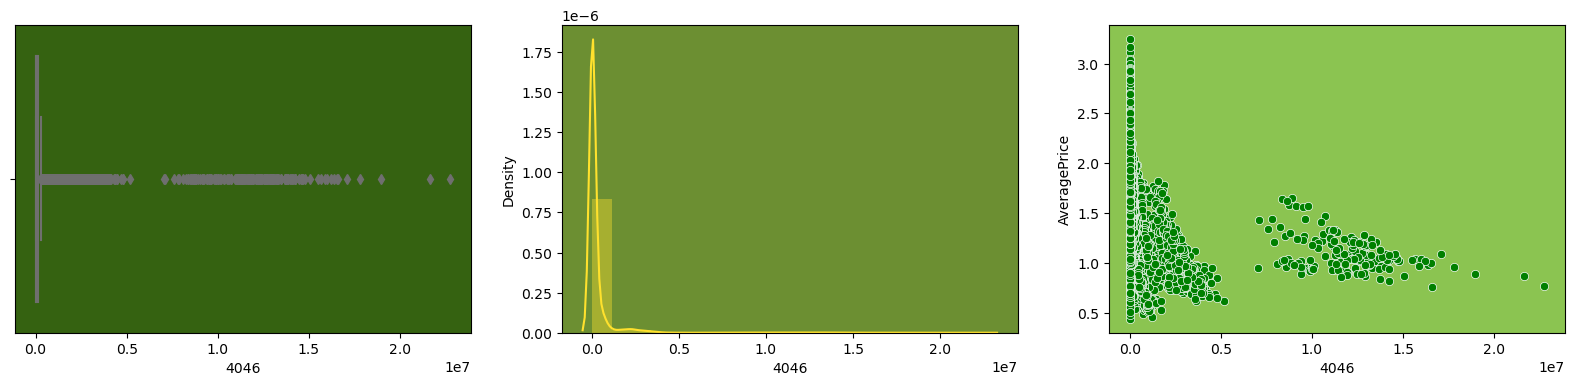

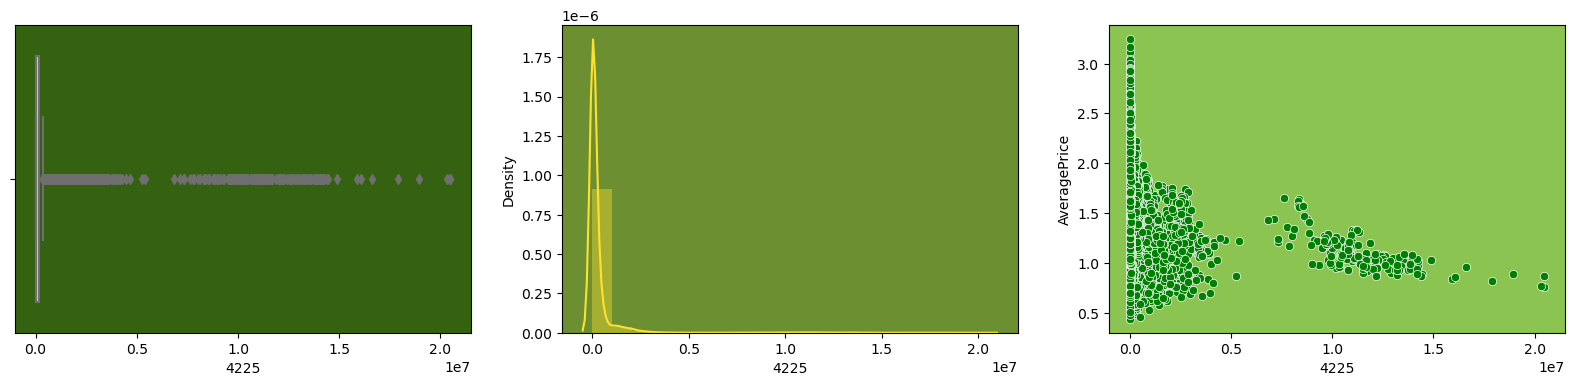

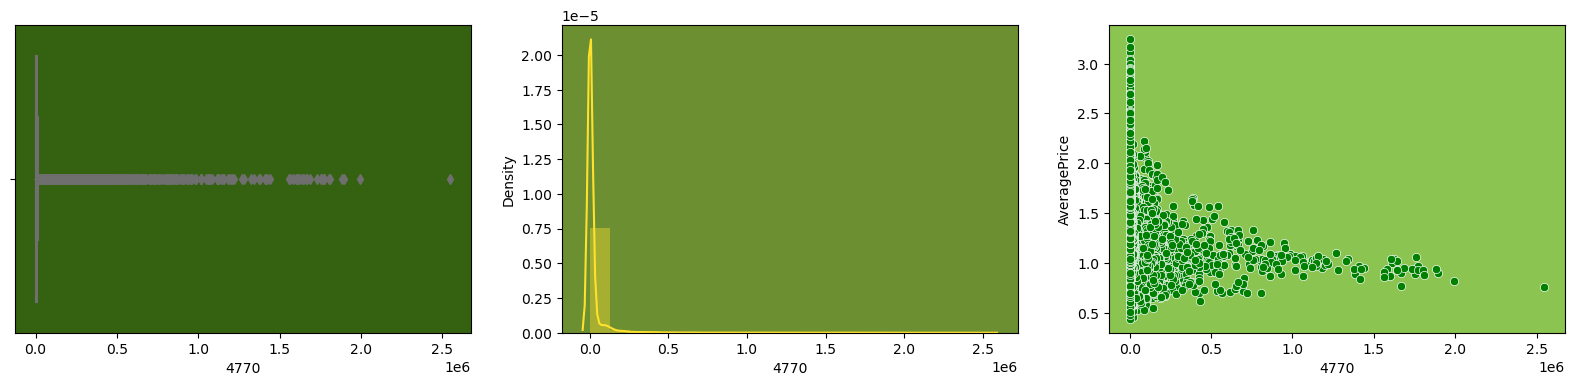

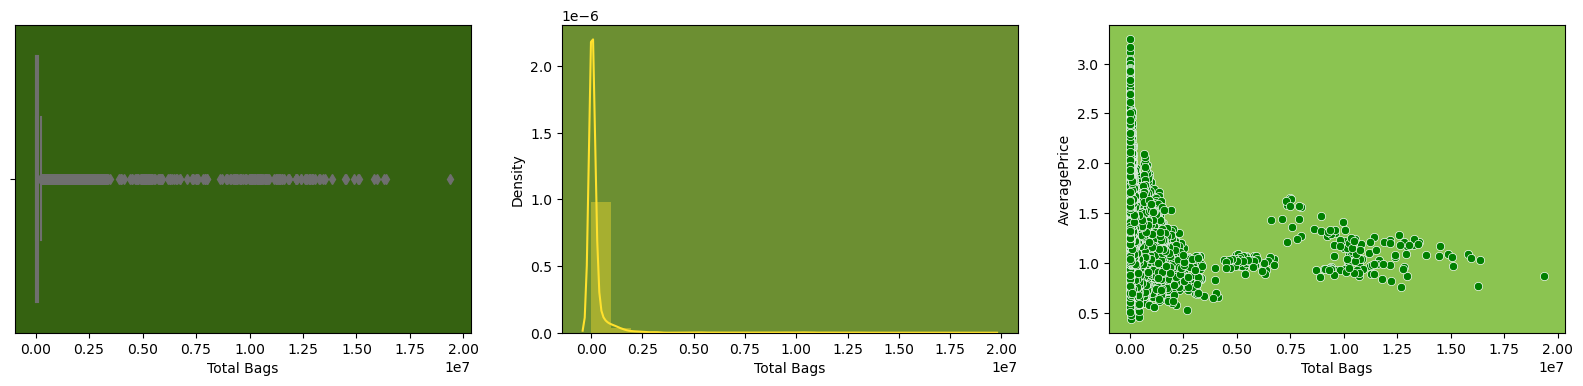

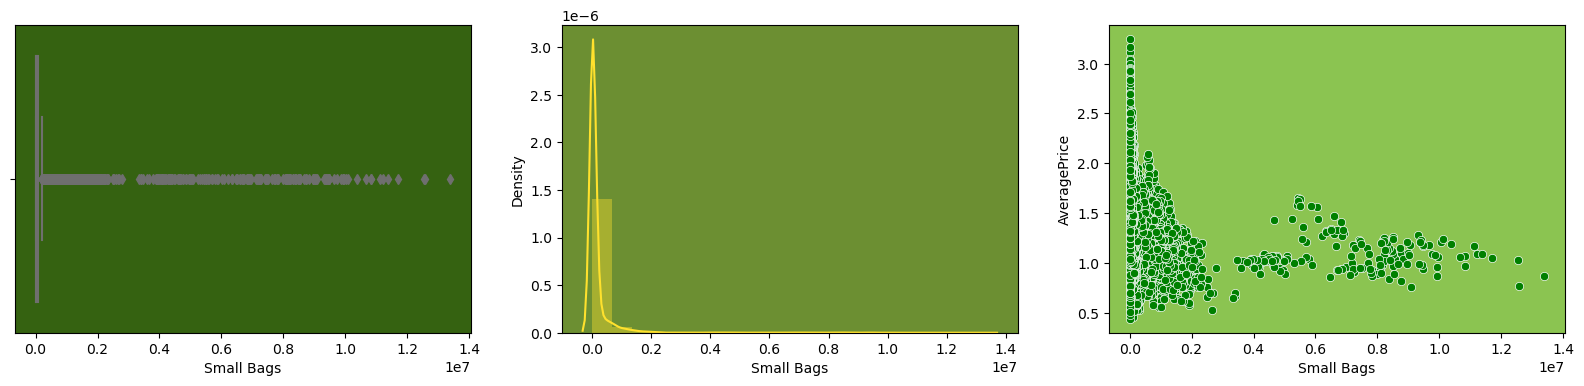

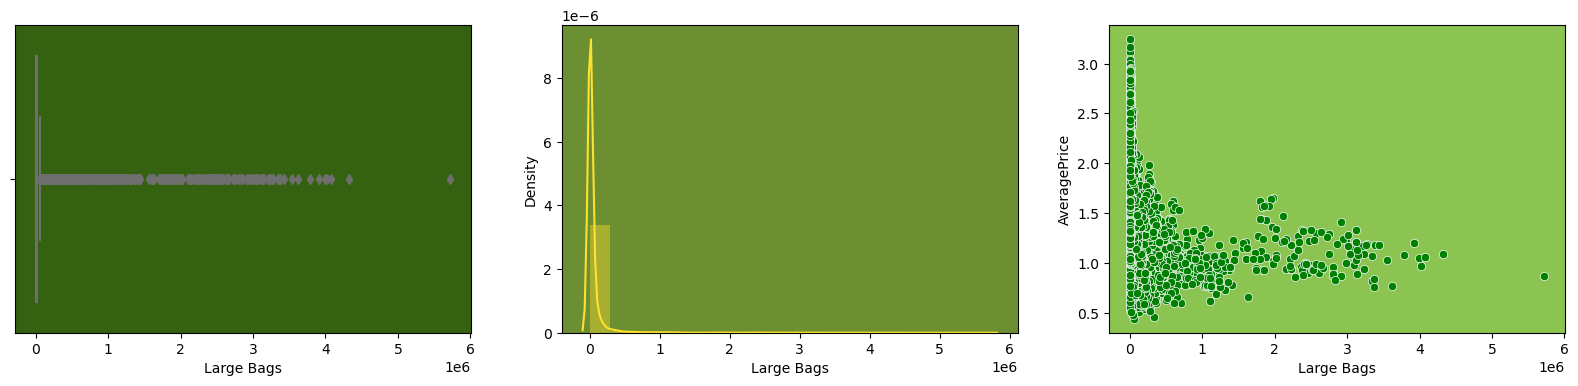

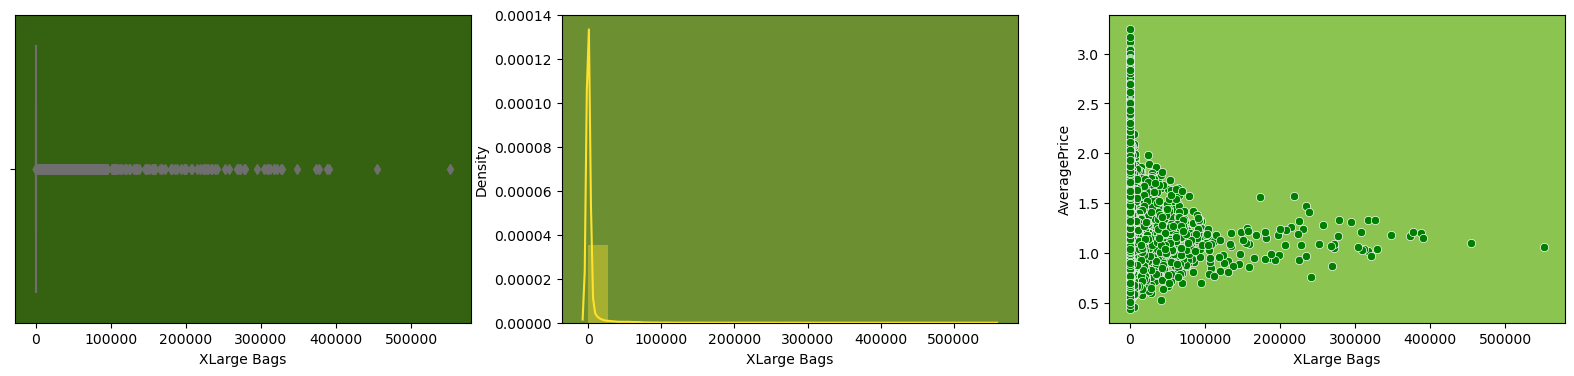

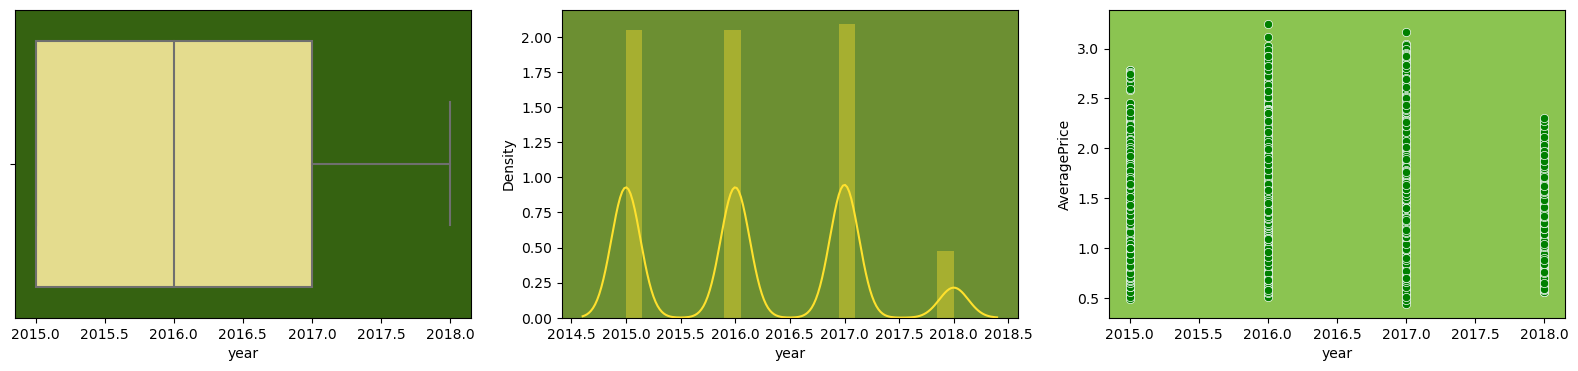

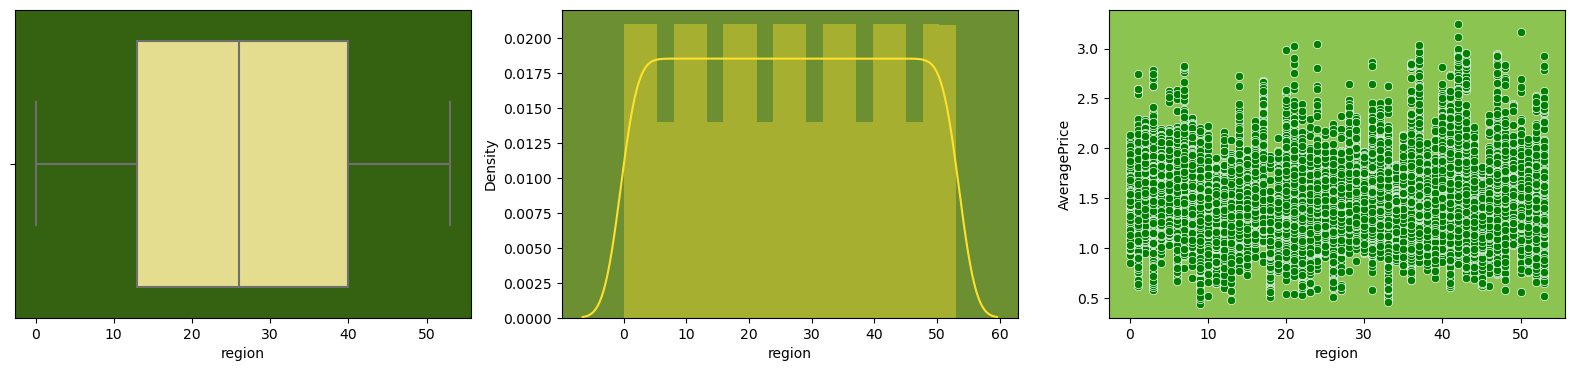

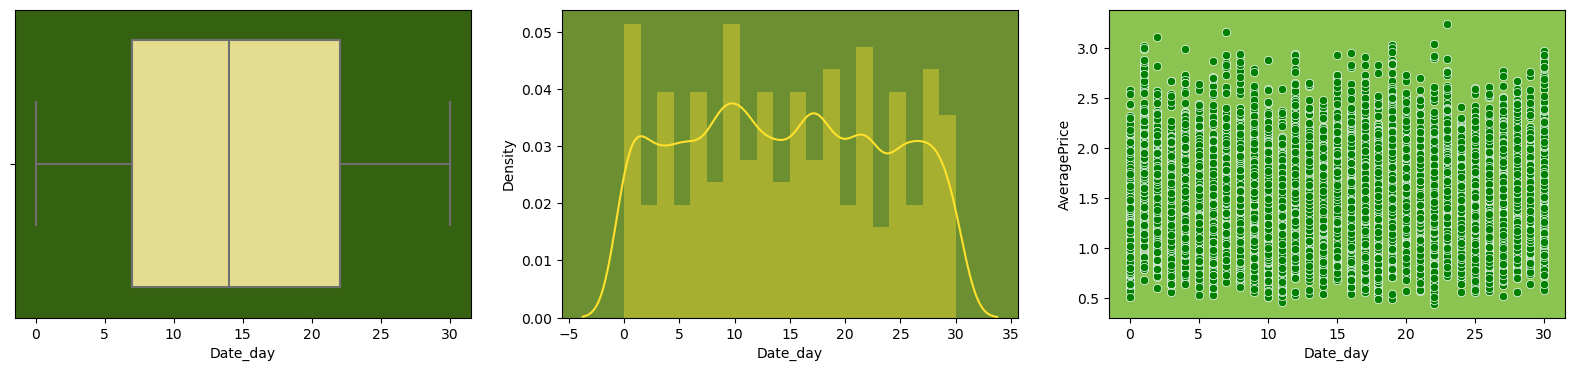

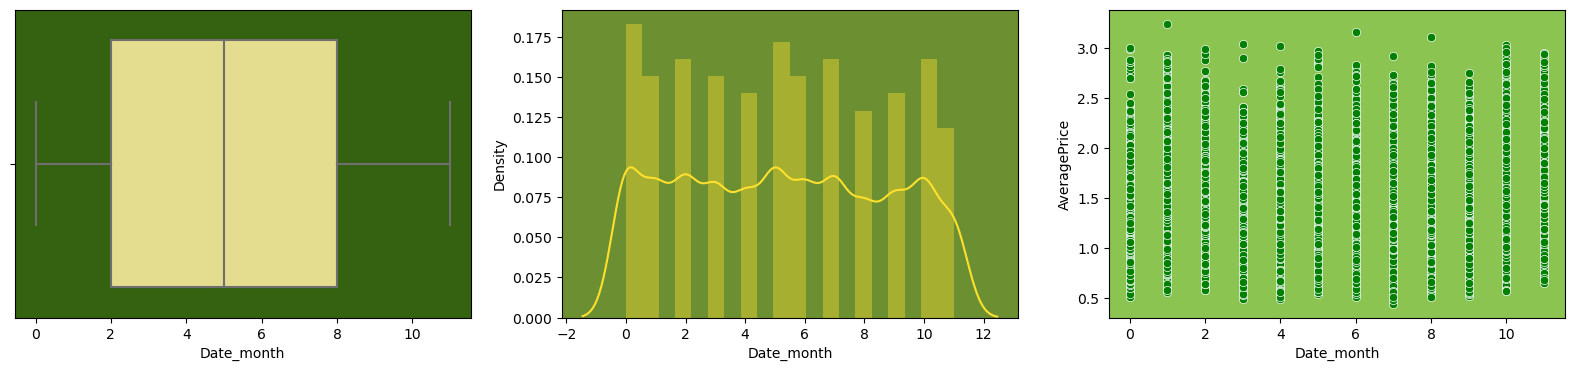

In [31]:
target_variable_1 = "AveragePrice"
feature_variable = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region',
       'Date_day', 'Date_month']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=Avacado_color_1)
    a1.set_facecolor(Avacado_color_4)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=Avacado_color_2)
    a2.set_facecolor(Avacado_color_5)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_1, ax=axs[2], color="g")
    a3.set_facecolor(Avacado_color_3)
    plt.show()
    
for i in feature_variable:
    num_plots(i)  

The above is the observation of the Feature variable with Target variable 1 as clear that the variable which has more correlation has more scattered points in the data

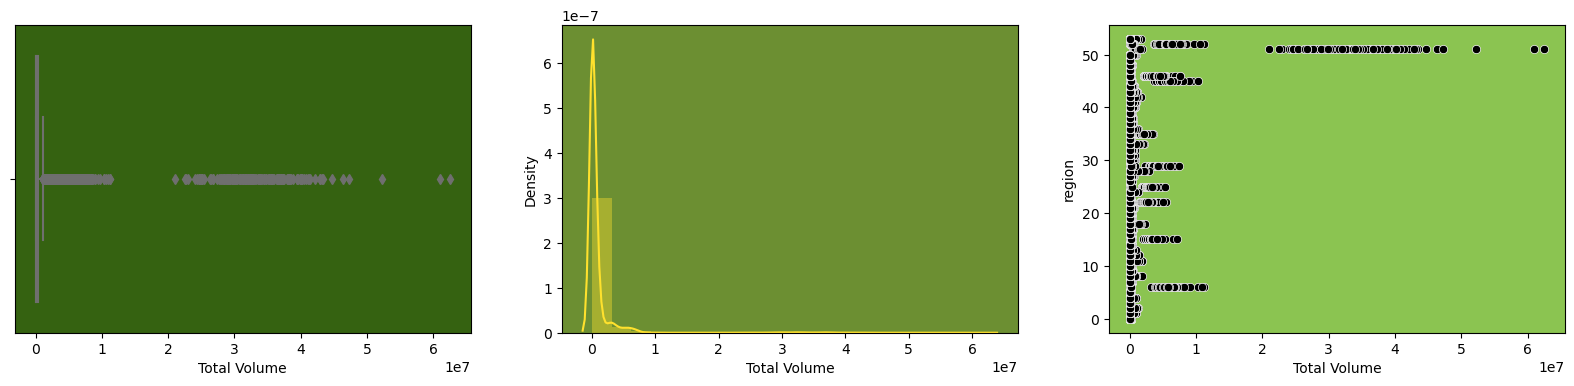

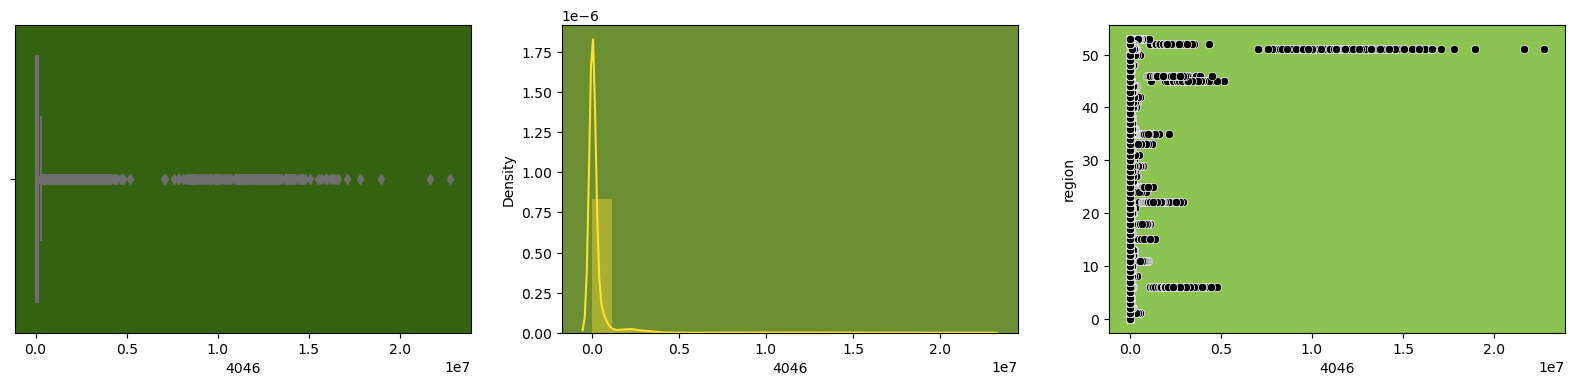

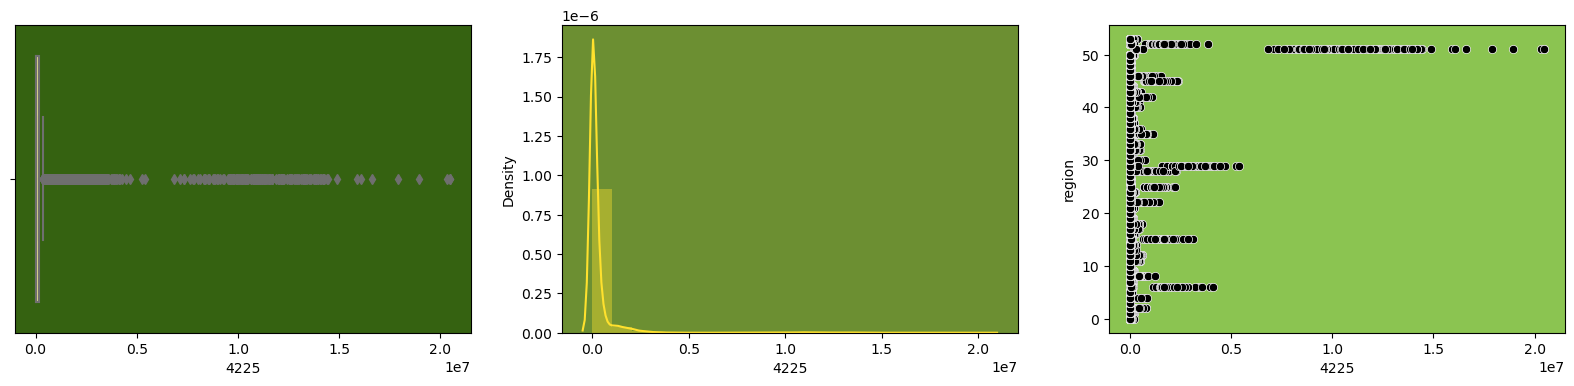

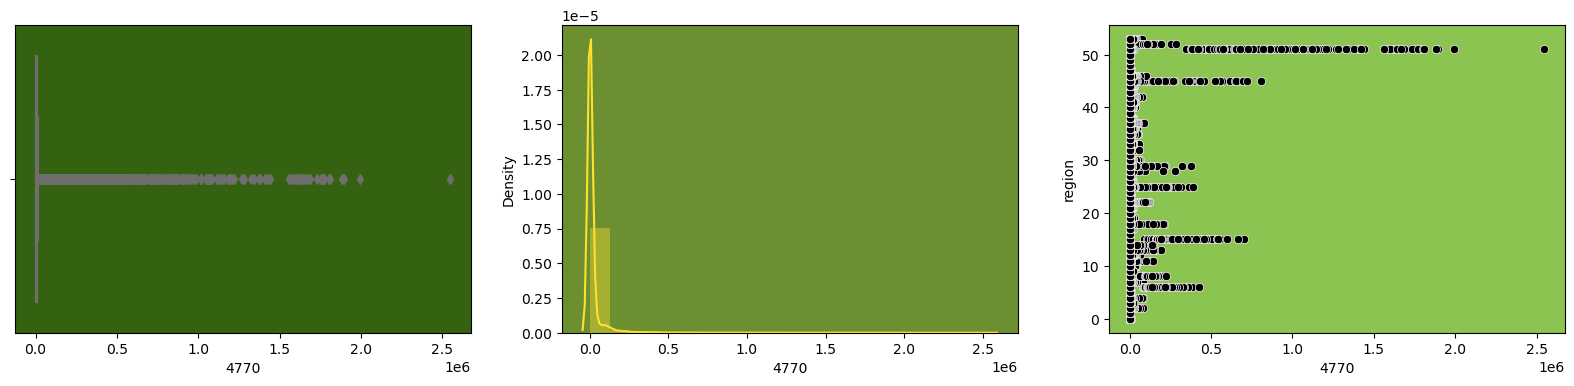

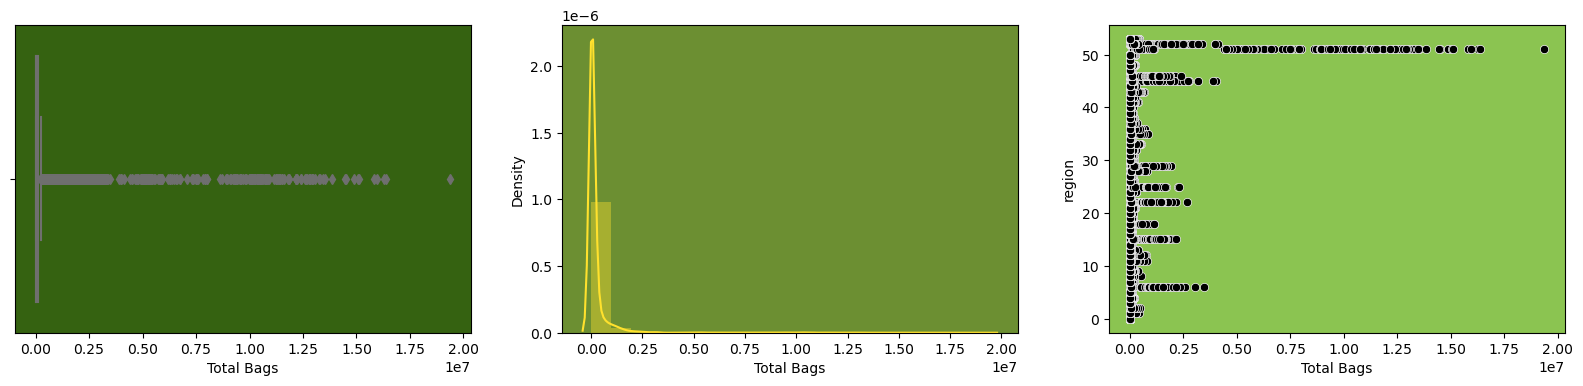

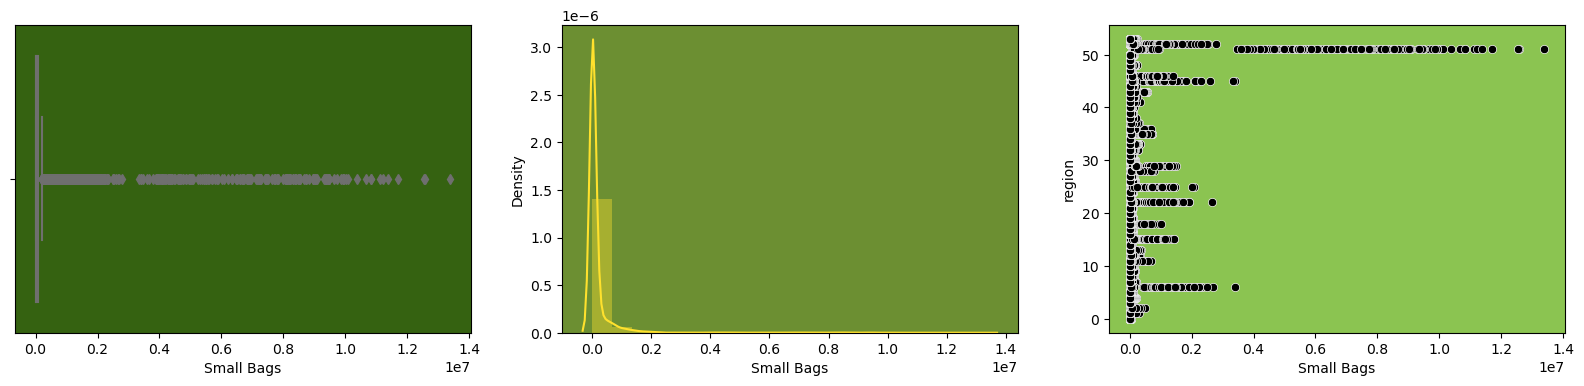

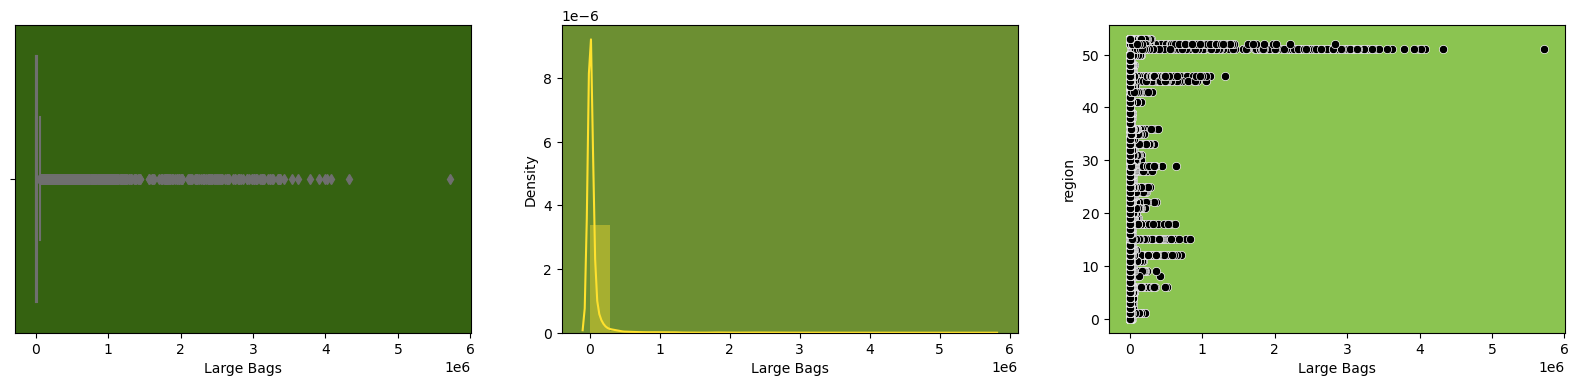

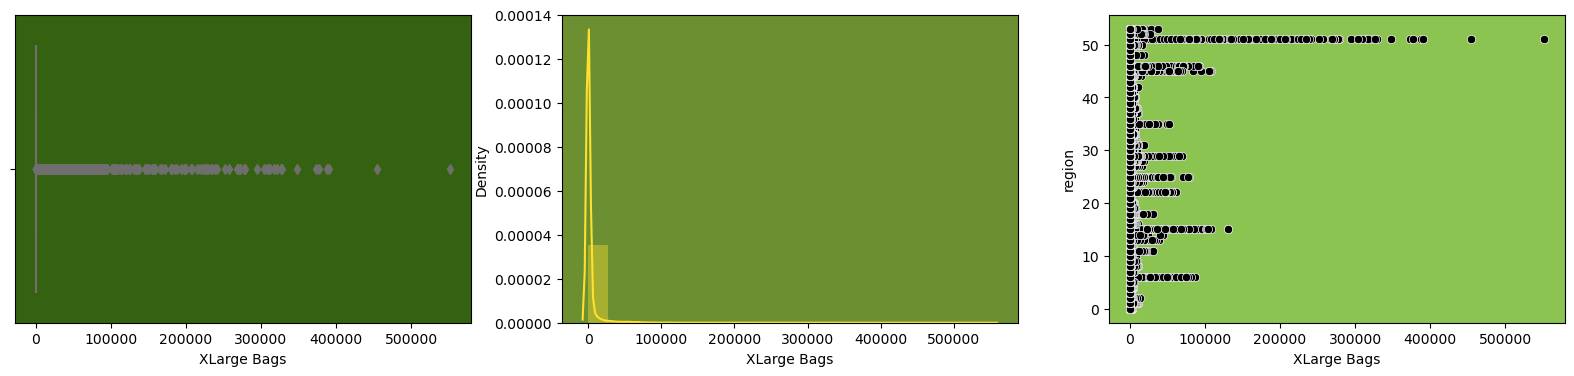

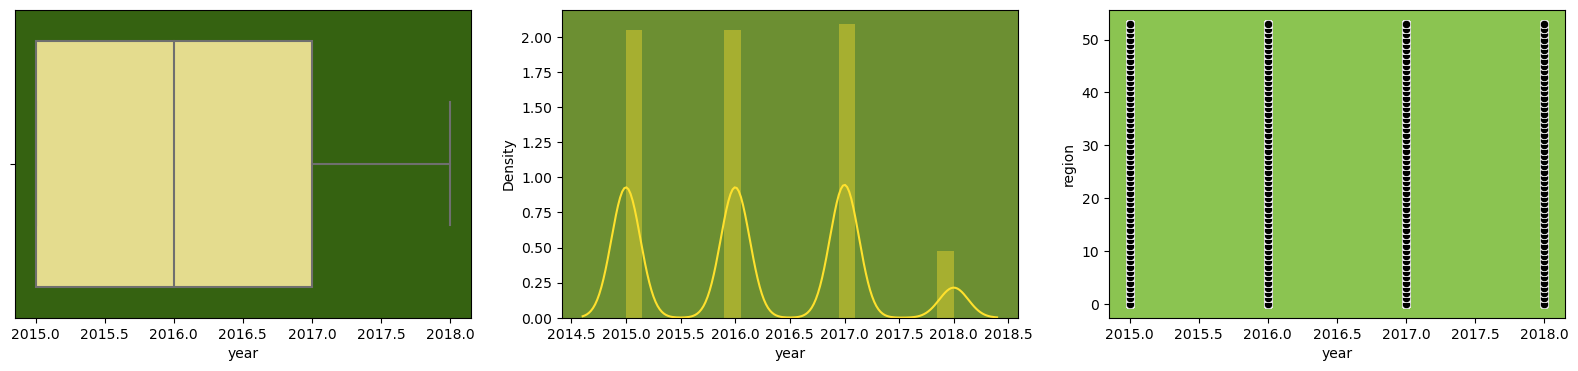

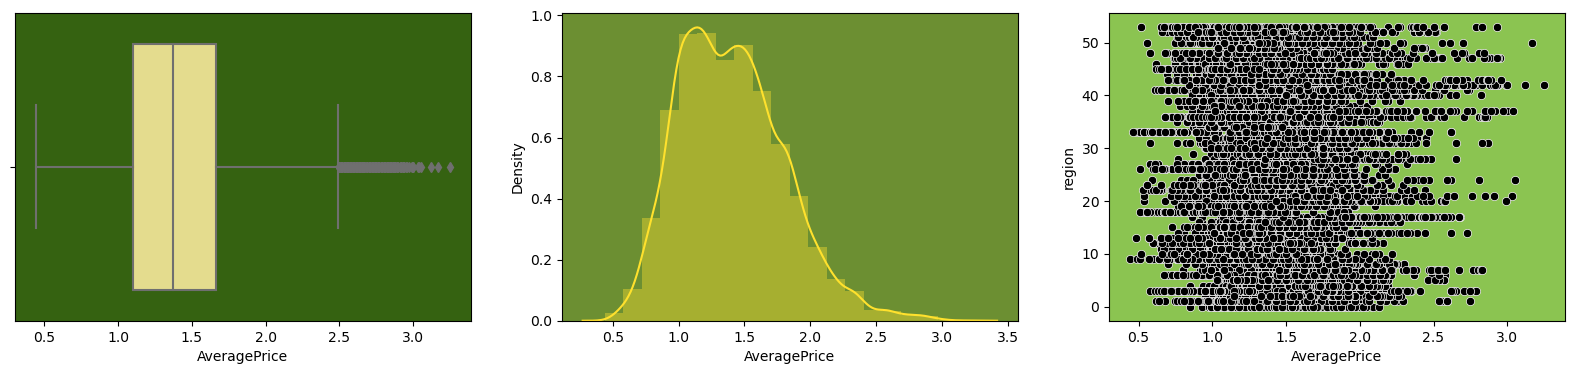

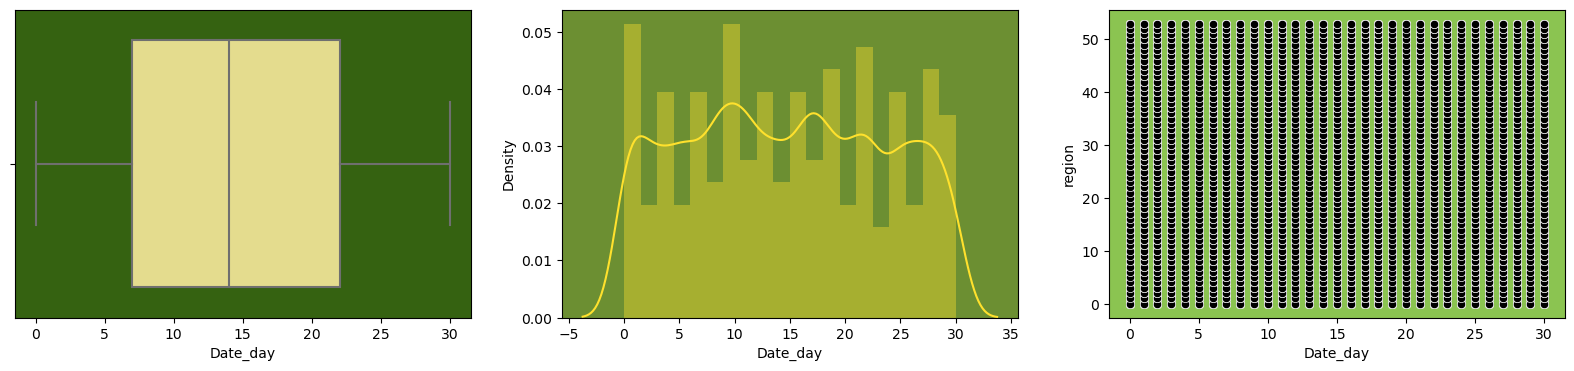

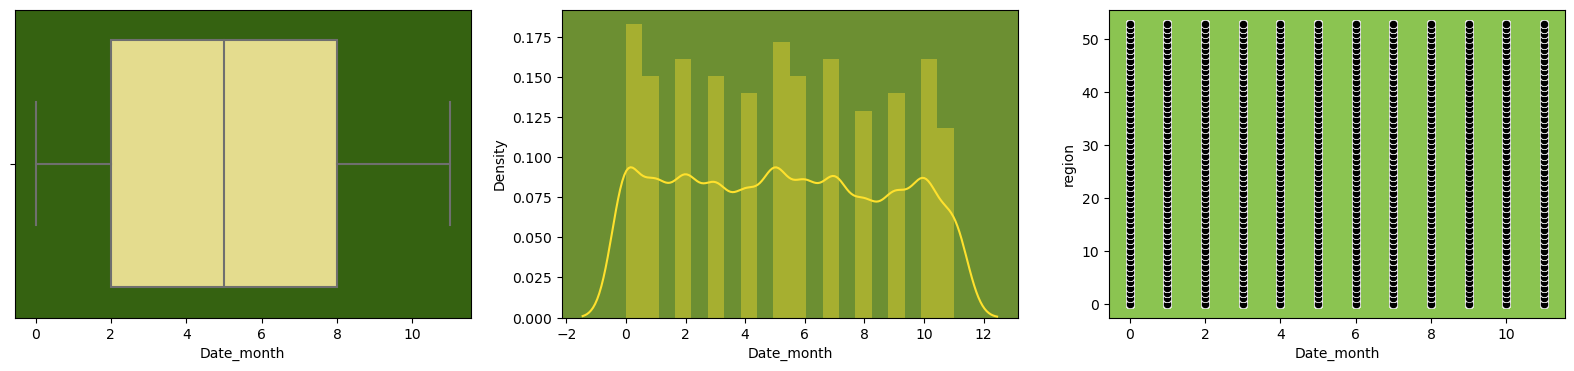

In [32]:
target_variable_2 = 'region'
feature_variable = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year',"AveragePrice" ,
       'Date_day', 'Date_month']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=Avacado_color_1)
    a1.set_facecolor(Avacado_color_4)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=Avacado_color_2)
    a2.set_facecolor(Avacado_color_5)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_2, ax=axs[2], color="k")
    a3.set_facecolor(Avacado_color_3)
    plt.show()
    
for i in feature_variable:
    num_plots(i) 

As similar to Target variable 1 the above is the observation of the Feature variable with Target variable 2 as clear that the variable which has more correlation has more scattered points in the data

In [33]:
x_2=df.drop(["region"], axis = 1)
y_2=df.region
x_1=df.drop(["AveragePrice"], axis = 1)
y_1=df.AveragePrice
# x_1 is target vatiable 1 y_1 is the feature variable 1
# x_2 is target vatiable 1 y_2 is the feature variable 1

In [34]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

### Scaling the DataSet

In [35]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_1, x_2= sc.fit_transform(x_1), sc.fit_transform(x_2)
x_1

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -1.7002522 ,
         0.49419389, -0.66010548],
       [-0.23042664, -0.23110251, -0.20805446, ..., -1.7002522 ,
        -0.29599549, -0.66010548],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -1.7002522 ,
        -1.19906907, -0.66010548],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ...,  1.70081131,
        -0.18311129, -1.53182303],
       [-0.24162464, -0.2304279 , -0.24265143, ...,  1.70081131,
        -1.08618487, -1.53182303],
       [-0.24125273, -0.22934712, -0.24317042, ...,  1.70081131,
        -1.65060586,  1.08332963]])

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")        
        

Best Accuracy 44.70693012520955 found on randomstate 113


In [37]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

### Lets shortlist promising Regression models.

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [39]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42),
          SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), 
          AdaBoostRegressor(random_state=42), 
          RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", 
               "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", 
               "AdaBoostRegressor", "RandomForestRegressor"]

In [40]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.4022706867614537

ERROR:
MEAN ABSOLUTE ERROR:  0.22976481635855234
MEAN SQUARED ERROR:  0.08948179291120391
ROOT MEAN SQUARED ERROR : 0.29913507469236017
R2 SCORE:  0.44706930125209554
**********************************************************************************************************



Score of Lasso() is: 0.0

ERROR:
MEAN ABSOLUTE ERROR:  0.32580587782540366
MEAN SQUARED ERROR:  0.16183239647242914
ROOT MEAN SQUARED ERROR : 0.402283974913778
R2 SCORE:  -3.4325457085593314e-06
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.40219547998411387

ERROR:
MEAN ABSOLUTE ERROR:  0.22975917105071958
MEAN SQUARED ERROR:  0.08948391103967512
ROOT MEAN SQUARED ERROR : 0.29913861509286144
R2 SCORE:  0.4470562127989306
**********************************************************************************************************



Score of SVR() is: 0.545

In [41]:
mean_score= []
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [-1.50704212e-01  7.37619377e-02  3.31516348e-01 -4.25956996e-02
 -4.48811158e+01]
MEAN OF SCORE is : -8.933827477207092
Standard Deviation : 17.974359821766704
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-3.98236185 -0.75045983 -0.01749803 -0.47032699 -0.80592045]
MEAN OF SCORE is : -1.2053134266962335
Standard Deviation : 1.4162990473970891
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [-0.15357762  0.07377033  0.33167813 -0.04174075  0.00645089]
MEAN OF SCORE is : 0.04331619349209879
Standard Deviation : 0.16213634496648907
**************************************************************************************************



SCORE OF SVR() IS:
SCORE IS: [-0.03723292  0.39608037  0.39012082  0.02813119 -0.27240701]
MEAN OF SCORE is : 0.1009384906

In [42]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
5,DecisionTreeRegressor,1.000000,-0.375607,0.347137,0.149007,0.051121,0.226099,0.684113
7,RandomForestRegressor,0.979197,0.256151,0.171403,0.108073,0.024332,0.155986,0.849649
4,KNeighborsRegressor,0.664990,-0.034534,0.250336,0.206037,0.080120,0.283054,0.504921
3,SVR,0.545487,0.100938,0.258656,0.196589,0.071036,0.266527,0.561048
6,AdaBoostRegressor,0.497012,-0.099228,0.530770,0.230349,0.080124,0.283061,0.504895
0,LinearRegression,0.402271,-8.933827,17.974360,0.229765,0.089482,0.299135,0.447069
2,Ridge,0.402195,0.043316,0.162136,0.229759,0.089484,0.299139,0.447056
1,Lasso,0.000000,-1.205313,1.416299,0.325806,0.161832,0.402284,-0.000003


From Above observation its is evident that Randomforest is the best model with Score of 0.97 lets try in Hyper tuning the same

In [43]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train_1, y_train_1, cv=5, n_jobs=-1).mean()

1.4096585415753324

In [44]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Hyper Parameter Tuning : GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [46]:
param_grid = [{"bootstrap": [True],
     "criterion": ["squared_error", "squared_error"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : [1.0],
     "min_samples_split" : [2,4,8],}]

rf = RandomForestRegressor(random_state=42)

In [47]:
reg_grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)

In [48]:
reg_grid.fit(x_train_1, y_train_1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True],
                          'criterion': ['squared_error', 'squared_error'],
                          'max_features': [1.0], 'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [49]:
reg_grid.best_score_

0.8355075437699832

In [50]:
reg_grid.best_estimator_

RandomForestRegressor(random_state=42)

In [51]:
reg_final_model = reg_grid.best_estimator_
preds = cross_val_predict(reg_final_model, x_train_1, y_train_1, cv=5, n_jobs=-1)
preds.mean()

1.4096585415753324

In [52]:
reg_final_model.fit(x_train_1,y_train_1)

RandomForestRegressor(random_state=42)

In [53]:
reg_final_model.score(x_train_1,y_train_1)

0.9791972195307018

### Lets Train our second Target variable

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accu = 0
for i in range(0,500):
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size = .25, random_state = i)
    mod = GaussianNB()
    mod.fit(x_train_2,y_train_2)
    y_pred = mod.predict(x_test_2)
    tempacc = accuracy_score(y_test_2,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")  

Best Accuracy 32.6758711374096 found on randomstate 418


In [55]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size = .25, random_state = best_rstate)

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

### Lets shortlist promising Classification models.

In [57]:
def evaluate_model(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    accuracy, accuracy_std = scores['test_accuracy'].mean(), \
                                scores['test_accuracy'].std()
    
    precision, precision_std = scores['test_precision'].mean(), \
                                scores['test_precision'].std()
    
    recall, recall_std = scores['test_recall'].mean(), \
                                scores['test_recall'].std()
    
    f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

    
    result = {
        "Accuracy": accuracy,
        "Accuracy std": accuracy_std,
        "Precision": precision,
        "Precision std": precision_std,
        "Recall": recall,
        "Recall std": recall_std,
        "f1": f1,
        "f1 std": f1_std,
    }
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return result

In [58]:
models_2 = [GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), xgb.XGBClassifier()]

model_names_2 = ["Naive Bayes Gaussian", "K Neighbors Classifier", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", "XGBoost"]


In [59]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models_2)):
    print(f"\n\nStep {model+1} of {len(models_2)}")
    print(f"............................................................running {model_names_2[model]}")
    
    clf_scores = evaluate_model(models_2[model], x_train_2, y_train_2)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 7
............................................................running Naive Bayes Gaussian
Accuracy: 0.3025723301039538 - (std: 0.005474919074475833)
Precision: 0.5127176870166357 - (std: 0.00717271835878298)
Recall: 0.3025723301039538 - (std: 0.005474919074475833)
f1: 0.350648701749426 - (std: 0.006397683414707677)


Step 2 of 7
............................................................running K Neighbors Classifier
Accuracy: 0.12837943256827614 - (std: 0.0032916186085244674)
Precision: 0.1921581468213102 - (std: 0.0075270919086672106)
Recall: 0.12837943256827614 - (std: 0.0032916186085244674)
f1: 0.14186072105675676 - (std: 0.004191618991621529)


Step 3 of 7
............................................................running Random Forest
Accuracy: 0.8931023954663964 - (std: 0.0038926193304228986)
Precision: 0.8943797134151092 - (std: 0.004297328234497391)
Recall: 0.8931023954663964 - (std: 0.0038926193304228986)
f1: 0.8926824534733597 - (std: 0.004159120333733566)


S

In [60]:
mean_score= []
STD=[]
for m in models_2:
    CV=cross_val_score(m,x_2,y_2,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF GaussianNB() IS:
SCORE IS: [ 0.26522571 -0.1109314  -1.10840624 -1.97503329 -2.05823523]
MEAN OF SCORE is : -0.9974760919900909
Standard Deviation : 0.9458869752496943
**************************************************************************************************



SCORE OF KNeighborsClassifier() IS:
SCORE IS: [-1.06867284 -0.93698534 -1.17721119 -1.396814   -1.40870163]
MEAN OF SCORE is : -1.1976769980012627
Standard Deviation : 0.1839608688811959
**************************************************************************************************



SCORE OF RandomForestClassifier(random_state=42) IS:
SCORE IS: [0.31287412 0.64478871 0.56685589 0.39536607 0.05953325]
MEAN OF SCORE is : 0.39588360854138144
Standard Deviation : 0.20552745429725214
**************************************************************************************************



SCORE OF DecisionTreeClassifier(random_state=42) IS:
SCORE IS: [-0.05193821  0.48215533  0.2140705   0.02508516 -0.15977667]
MEAN 

In [61]:
classification_result = pd.DataFrame({"Model": model_names_2,
                                      "CV_mean_score":mean_score,
                                      "CV_STD":STD,
                                      "accuracy": accuracy,
                                      "precision": precision,
                                      "recall": recall,
                                      "f1": f1})
classification_result.sort_values(by="f1", ascending=False)

,Model,CV_mean_score,CV_STD,accuracy,precision,recall,f1
2,Random Forest,0.395884,0.205527,0.893102,0.894380,0.893102,0.892682
6,XGBoost,0.354329,0.224829,0.864095,0.866723,0.864095,0.864117
3,Decision Tree,0.101919,0.225928,0.769108,0.772446,0.769108,0.768840
4,Extra Tree,-0.274015,0.362347,0.628891,0.631701,0.628891,0.627880
0,Naive Bayes Gaussian,-0.997476,0.945887,0.302572,0.512718,0.302572,0.350649
1,K Neighbors Classifier,-1.197677,0.183961,0.128379,0.192158,0.128379,0.141861
5,Ada Boost,-1.261141,0.428730,0.064738,0.031977,0.064738,0.027743


From Above observation its is evident that Randomforest is the best model with F1 Score of 0.89 lets try in Hyper tuning the same

In [62]:
clf_rf = RandomForestClassifier(random_state=42)
preds = cross_val_predict(clf_rf, x_train_2, y_train_2, cv=5, n_jobs=-1)

In [63]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [64]:
param_grid = [
    {"n_estimators": range(0,100), 
     "bootstrap": [True],
     "criterion": ["gini","gini"],   
     "max_depth": [None],
     "max_features": ["sqrt"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],}]

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [65]:
clf_random = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [66]:
clf_random.fit(x_train_2, y_train_2)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'gini'],
                          'max_depth': [None], 'max_features': ['sqrt'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': range(0, 100)}],
             scoring='f1_weighted', verbose=2)

In [67]:
clf_random.best_params_ 

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 74}

In [68]:
clf_random.best_score_

0.8836884813226634

In [69]:
preds = cross_val_predict(clf_random.best_estimator_, x_train_2, y_train_2, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train_2, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       242
           1       0.83      0.85      0.84       253
           2       0.94      0.98      0.96       256
           3       0.89      0.84      0.86       253
           4       0.95      0.95      0.95       255
           5       0.87      0.81      0.84       250
           6       0.98      0.98      0.98       246
           7       0.89      0.89      0.89       254
           8       0.96      0.97      0.97       246
           9       0.85      0.88      0.86       254
          10       0.85      0.82      0.84       246
          11       0.95      0.94      0.94       248
          12       0.96      0.94      0.95       263
          13       0.83      0.82      0.83       253
          14       0.86      0.95      0.90       250
          15       0.98      0.97      0.98       264
          16       0.96      0.95      0.96       269
          17       0.90    

In [70]:
classifier_final_model = clf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test_2)
 
pd.crosstab(y_test_2, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
Actual,,,,,,,,,,,,,,,,,,,,,
0,94,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,74,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0
2,0,0,80,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,74,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,72,0,0,0,0,...,0,0,0,0,0,5,1,0,0,0
6,0,0,0,0,0,0,91,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,77,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,89,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
conf_mx = metrics.confusion_matrix(y_test_2, y_pred)

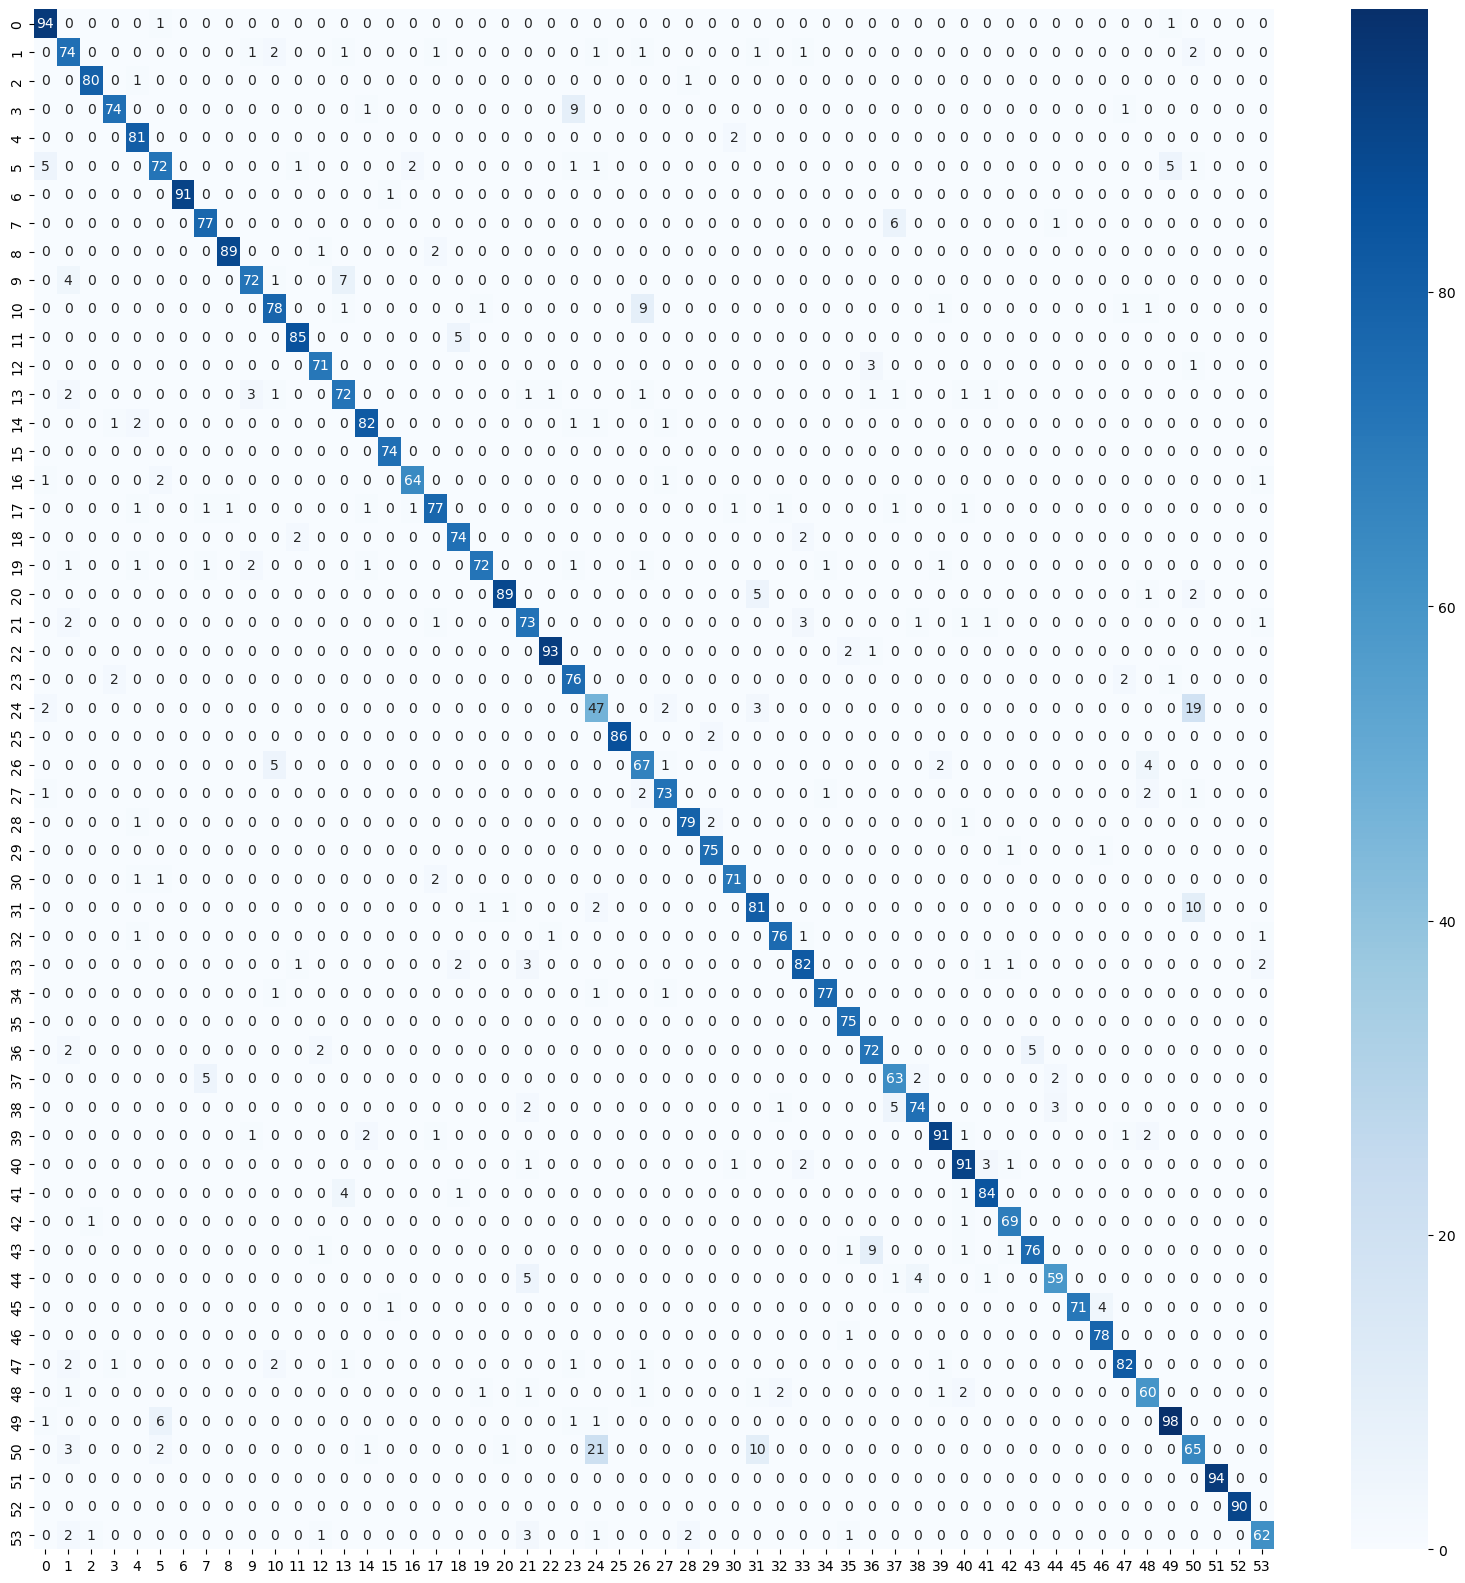

In [72]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=classifier_final_model.classes_,
                 yticklabels=classifier_final_model.classes_,
                cmap= "Blues")

Conclusion:

This study aims to better understand avocado shoppers by developing a shopper segmentation based on their actual avocado purchase levels

MARKETERS & RETAILERS LEARN:

What is the trend of the price. This study looks at 49 regional demographic variables for avocado-purchasing. Learn how avocado shopper demographics and purchases trends in each region.

In [73]:
# Saving the final model

import joblib
joblib.dump(reg_final_model,"Ava_averagepriceprediction.obj")

['Ava_averagepriceprediction.obj']

In [74]:
import joblib
joblib.dump(classifier_final_model,"Ava_Regionprediction.obj")

['Ava_Regionprediction.obj']